0. [Import Libraries](#0.-Import-Libraries)
1. [Import Data](#1.-Import-Data)
2. [Data Exploration](#2.-Data-Exploration)
3. [Data CLeaning](#3.-Data-Cleaning)
4. [Data Preparation](#4.-Data-Preparation)

# 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Visualisation / EDA
import matplotlib.pyplot as plt
import seaborn as sns
# Plot style
sns.set_style('darkgrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 1. Import Data

In [2]:
taxi_jan_2019 = pd.read_csv('data/yellow_tripdata_2019-01.csv')
# Create new concat dataframe for future data
df = pd.concat([taxi_jan_2019])

Sample dataset:

In [3]:
print(f"Column shape: {df.shape}\n")
df.head()

Column shape: (7667792, 18)



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


# 2. Data Exploration

Get more information about the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,2.811814e+06
mean,1.636775e+00,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.240941e+01,3.280394e-01,4.968458e-01,1.827367e+00,3.169187e-01,2.993382e-01,1.568222e+01,3.289691e-05
std,5.398204e-01,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.620721e+02,5.074789e-01,5.337843e-02,2.501213e+00,2.023665e+00,1.911711e-02,2.622932e+02,9.068695e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [7]:
# Select columns to keep 
df = df[[
    'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID',
    'PULocationID', 'DOLocationID', 'payment_type', 'total_amount'
]]

In [8]:
# View changes to columns
df.head(1)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95


In [9]:
# Numerical columns
num_cols = df.select_dtypes(include=np.number).columns
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns

In [10]:
# Check distribution of specific numerical columns
dist_cols = ['trip_distance', 'total_amount']
emp_steps = {1: '68%', 2: '95%', 3: '99.7%'}

for index, col in enumerate(dist_cols):
    # Standard deviation step count
    std_count = 1
    print(f"Checking distribution for: {col.upper().replace('_', ' ')}")
    
    # Iterate std_count until 3
    while std_count <= 3:
        # Get mean and standard deviation for current column
        col_mean, col_std = df[col].mean(), df[col].std()
        # Calculate upper / lower limit for current deviation
        upper_lim, lower_lim = col_mean + std_count * col_std, col_mean - std_count * col_std
        # Column deviation for current std_count
        col_std_mean = ((df[col] >= lower_lim) & (df[col] <= upper_lim)).mean()
        # Display results
        print(f"STD STEP: {std_count}, COLUMN MEAN: {col_std_mean:.2f}%, TARGET 0.{emp_steps[std_count]}")
        
        std_count += 1
        
    if index < len(dist_cols) - 1:
        print('\n')

Checking distribution for: TRIP DISTANCE
STD STEP: 1, COLUMN MEAN: 0.90%, TARGET 0.68%
STD STEP: 2, COLUMN MEAN: 0.95%, TARGET 0.95%
STD STEP: 3, COLUMN MEAN: 0.97%, TARGET 0.99.7%


Checking distribution for: TOTAL AMOUNT
STD STEP: 1, COLUMN MEAN: 1.00%, TARGET 0.68%
STD STEP: 2, COLUMN MEAN: 1.00%, TARGET 0.95%
STD STEP: 3, COLUMN MEAN: 1.00%, TARGET 0.99.7%


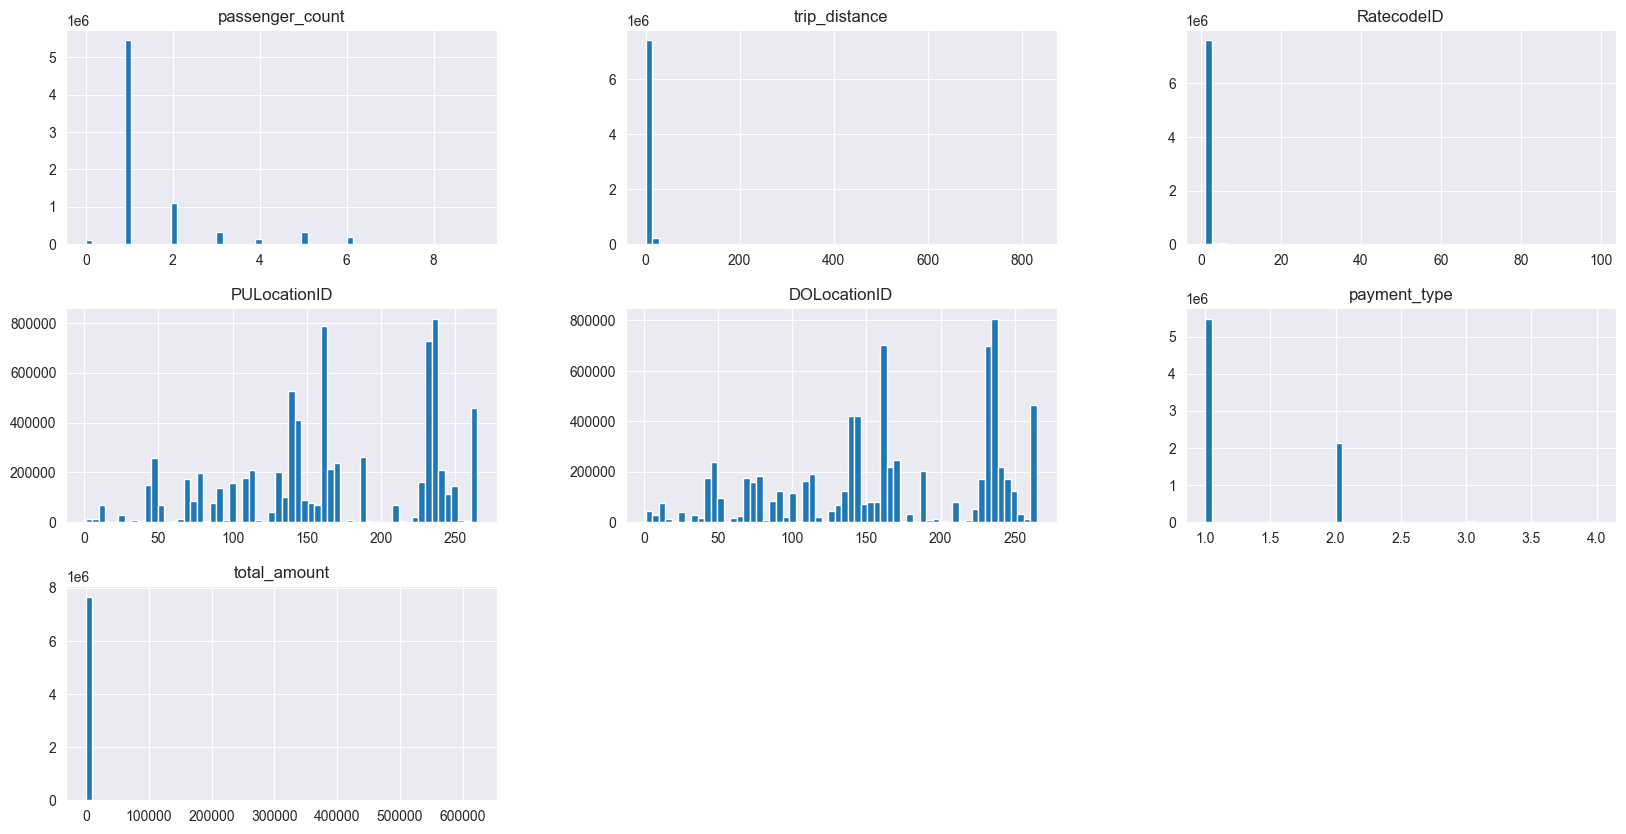

In [11]:
df.hist(figsize=(20, 10), bins=60)
plt.show()

`payment_type` and `RatecodeID` require further investgiation.

In [12]:
# All values in RatecodeID 
df['RatecodeID'].value_counts()

RatecodeID
1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: count, dtype: int64

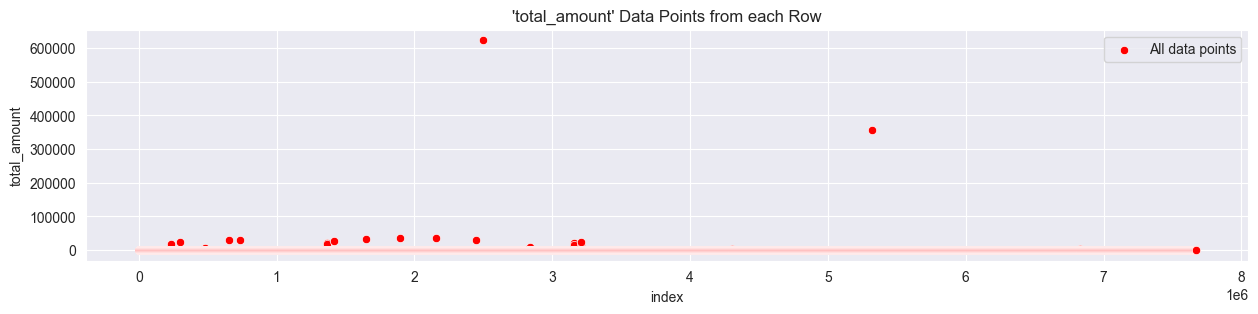

In [13]:
# total_amount data points by row index
plt.figure(figsize=(15, 3))
plt.title(F"'total_amount' Data Points from each Row")
sns.scatterplot(data=df.reset_index(), x='index', y='total_amount', label='All data points', color='red')
plt.legend()
plt.show()

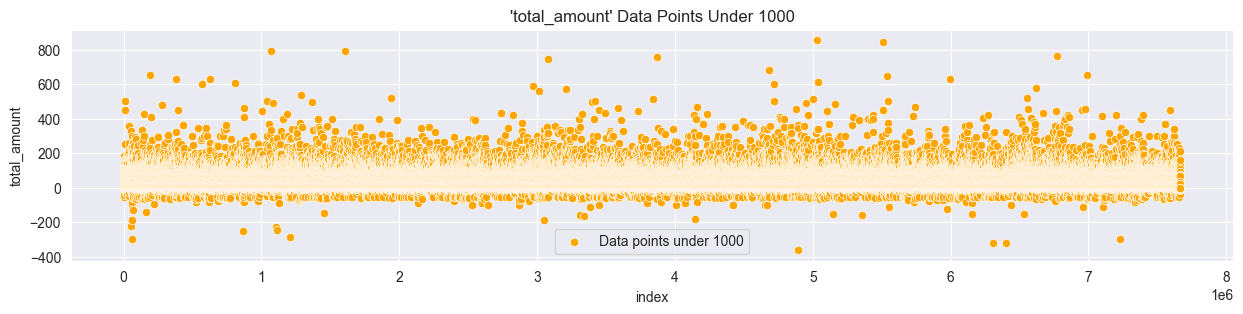

In [14]:
# total_amount data points under 1000
under_1000 = df[df['total_amount'] < 1000]

plt.figure(figsize=(15, 3))
plt.title(f"'total_amount' Data Points Under 1000")
sns.scatterplot(data=under_1000.reset_index(), x='index', y='total_amount', label='Data points under 1000', color='orange')
plt.legend()
plt.show()

Looks like there are negative values in `total_amount` which is invalid. 

Total of negative values in total_amount: 7131



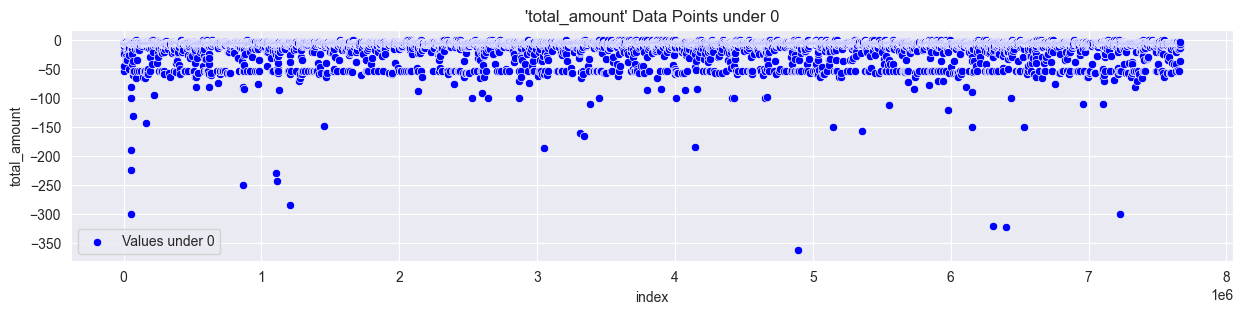

In [15]:
under_0 = df[df['total_amount'] < 0]
print(f"Total of negative values in total_amount: {under_0.shape[0]}\n")

plt.figure(figsize=(15, 3))
plt.title("'total_amount' Data Points under 0")
sns.scatterplot(data=under_0.reset_index(), x='index', y='total_amount', label='Values under 0', color='blue')
plt.legend()
plt.show()

In [16]:
under_0.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


Taking a closer look at the `payment_type` column, most of the values are either a 3 or 4 which indicates a dispute **[4]** or no charge was made **[3]**.

In [17]:
under_0['payment_type'].value_counts()

payment_type
3    4088
4    2666
2     376
1       1
Name: count, dtype: int64

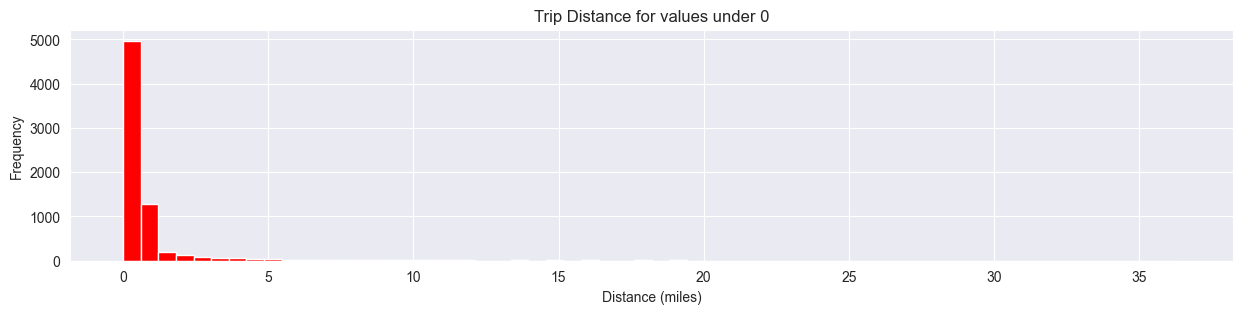

In [18]:
plt.title("Trip Distance for values under 0")
under_0['trip_distance'].hist(bins=60, figsize=(15, 3), color='red')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Convert pickup / dropoff columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [21]:
# Add duration column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).astype(str).str.split(' ')

In [22]:
df['duration']

0          [0, days, 00:06:40]
1          [0, days, 00:19:12]
2          [0, days, 00:04:10]
3          [0, days, 00:03:20]
4          [0, days, 00:01:36]
                  ...         
7667787    [0, days, 00:21:03]
7667788    [0, days, 00:01:08]
7667789    [0, days, 00:00:04]
7667790    [0, days, 00:00:27]
7667791    [0, days, 00:01:19]
Name: duration, Length: 7667792, dtype: object

# 3. Data Cleaning

In [104]:
# Remove outliers and invalid values from total_amount
df_filtered = df[(df['total_amount']) > 0 & (df['total_amount'] <= 200)]

In [105]:
# Check NaN values
df_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

# 4. Data Preparation

In [106]:
df_prepared = df_filtered.copy()

In [118]:
df_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55
